<a href="https://colab.research.google.com/github/abdelaziz-jaddi/Credit-Fraud-Benchmarking-sampling-techniques/blob/master/Credit_Fraud_Benchmarking_sampling_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Benchmarking data sampling techniques for Credit Card Fraud Detection

## **Introduction** 

This repository is going to show how I have used a HIGHLY unbalanced dataset — the Credit Card Fraud Detection dataset — from Kaggle. The target variables are 0 — for non fraudulent, and 1 — for fraudulent. The positive class 1 (fraudulent) accounts for only 0.17% of the whole dataset. How am I going to sample data for modelling when there is so much imbalance?

In this project, several implemented data sampling algorithms are used in conjunction with a classifier in order to examine the improvement of the classifier’s output quality.

Data sampling algorithms change the composition of the training dataset to improve the performance of a standard machine learning algorithm on an imbalanced classification problem.

There are perhaps three main types of data sampling techniques; we will implement the following methods:

**Data Oversamplinug:**
* Random Oversampling
* SMOTE
* ADASYN

**Data Undersampling:**
* Random Undersampling
* Tomek Links
* Edited Nearest Neighbors

**Combined Oversampling and Undersampling:**
* SMOTE and Random Undersampling
* SMOTE and Tomek Links
* SMOTE and Edited Nearest Neighbors

### Outline:

1. Data preparation and visualization

2. Benchmark over-sampling methods

3. Benchmark under-sampling methods

4. Benchmark over+under methods

### Data preparation and visualization

This dataset is a HIGHLY unbalanced dataset, meaning the target classes are unbalanced Class = 0,1 0 = Non-fraud 1 = Fraud


In [ ]:
!wget -O creditfraud.zip https://www.dropbox.com/s/tl20yp9bcl56oxt/creditcardfraud.zip?dl=0

--2020-10-01 10:04:01--  https://www.dropbox.com/s/tl20yp9bcl56oxt/creditcardfraud.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/tl20yp9bcl56oxt/creditcardfraud.zip [following]
--2020-10-01 10:04:02--  https://www.dropbox.com/s/raw/tl20yp9bcl56oxt/creditcardfraud.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8083a5837289afba9ee8295631.dl.dropboxusercontent.com/cd/0/inline/BAY12BnurZK2XYAWiVY9OJLZu2vG8ULk1F0uiCTYCgq9v4dOfvlh99p4bGi6rFzM5cjYY717RZdiYL9Zk9zxDcqkgdRXzkw5sN2230gINvP4VayzXIPVozdp5GObMDw4ulQ/file# [following]
--2020-10-01 10:04:02--  https://uc8083a5837289afba9ee8295631.dl.dropboxusercontent.com/cd/0/inline/BAY12BnurZK2XYAWiVY9OJLZu2vG8ULk1F0uiCTYCgq9v4dOfvlh99p4bGi6rFzM5cjYY717RZdiYL9Zk9zxD

In [ ]:
!unzip creditfraud.zip

Archive:  creditfraud.zip
  inflating: creditcard.csv          


## Data preparation

In [ ]:
# Imported Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy import interp
from sklearn import metrics
from sklearn.metrics import auc, roc_curve, average_precision_score, f1_score, precision_recall_curve, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from imblearn.pipeline import make_pipeline

df  = pd.read_csv('creditcard.csv')   
df.head()

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

#Split the data into x and y variables

X = df.drop('Class', axis=1)
y = df['Class']

df.head()


SK= StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in SK.split(X, y):
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]

train_unique_label, train_counts_label = np.unique(ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(ytest, return_counts=True)
print('Label Distributions in ytrain and ytest: \n')
print(train_counts_label)
print(test_counts_label)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Label Distributions in ytrain and ytest: 

[227452    394]
[56863    98]


## Benchmark over-sampling methods

Standard
[[56861     2]
 [   53    45]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


ADASYN
[[54824  2039]
 [   10    88]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


ROS
[[56178   685]
 [   13    85]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


SMOTE
[[56240   623]
 [   13    85]]


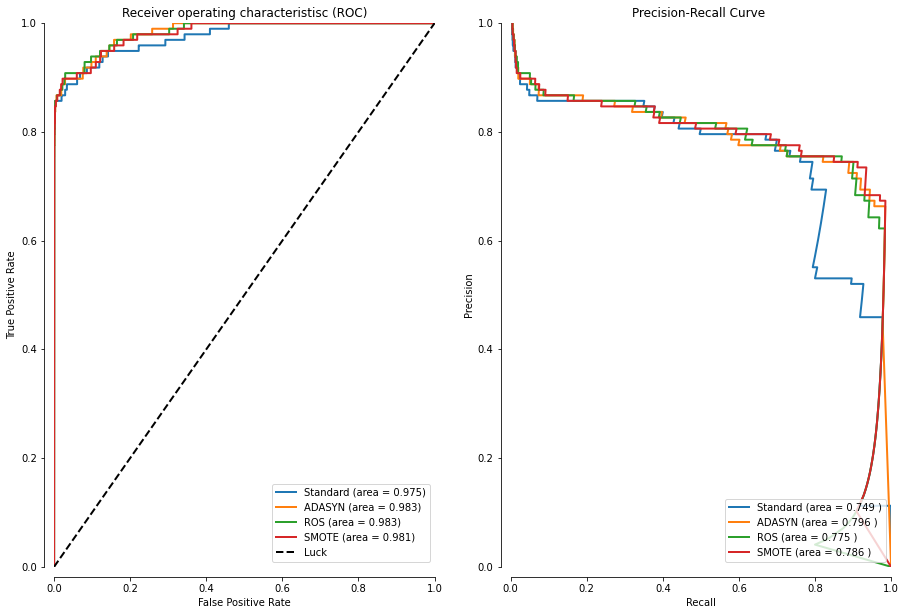

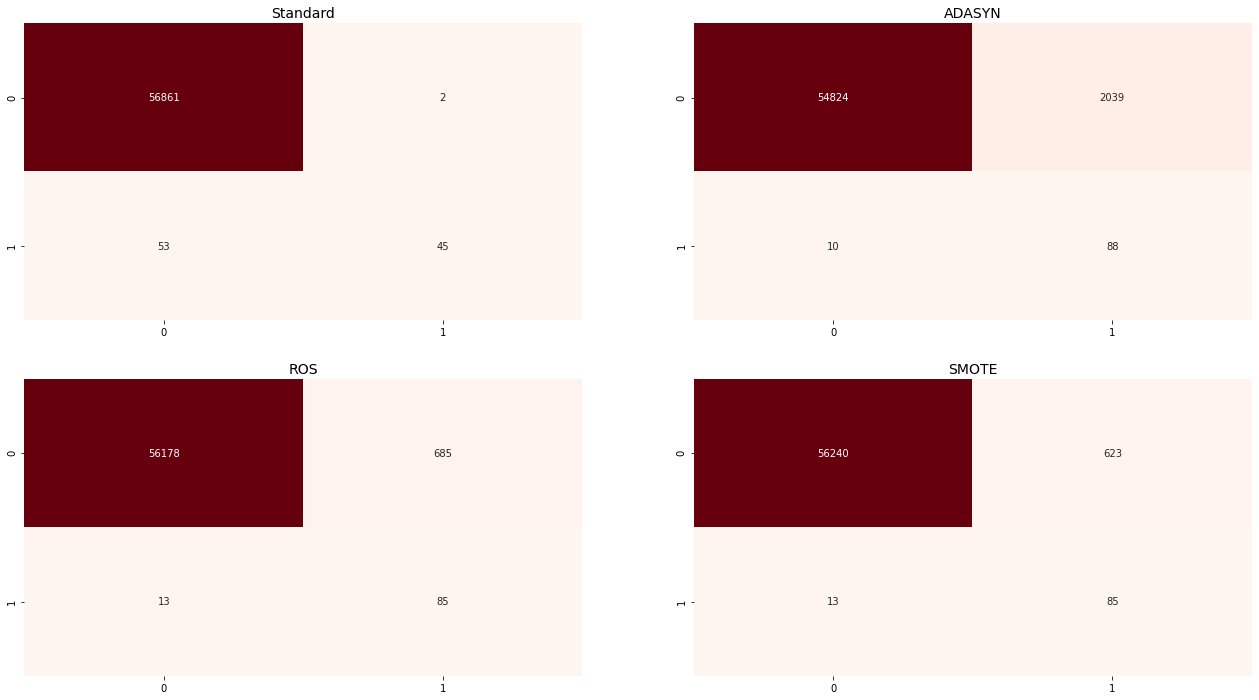

In [ ]:
LW = 2
RANDOM_STATE = 42

class DummySampler:
    def sample(self, X, y):
        return X, y

    def fit(self, X, y):
        return self

    def fit_resample(self, X, y):
        return self.sample(X, y)
    
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]}
rand_log_reg = RandomizedSearchCV(LogisticRegression(solver='liblinear'), log_reg_params, n_iter=4)
samplers = [
    ['Standard', DummySampler()],
    ['ADASYN', ADASYN( )],
    ['ROS', RandomOverSampler()],
    ['SMOTE', SMOTE()],]
pipelines = [['{}'.format(sampler[0]),make_pipeline(sampler[1], rand_log_reg )] for sampler in samplers ]
report_list = pd.DataFrame( index = ['f1', 'precision', 'recall',' average_precision' ],columns =[sampler[0] for sampler in samplers])

fig, axs = plt.subplots(1, 2, figsize=(15,10))
fig1, axs1 = plt.subplots(2, 2, figsize=(22,12))
title_cm= [sampler[0] for sampler in samplers]
for (idx, (name, pipeline)), ax1 in zip(enumerate(pipelines,0), axs1.flat):
    pipeline.fit(Xtrain, ytrain)
    best_clf = rand_log_reg.best_estimator_
    yhat= best_clf.predict_proba(Xtest)
    ypred0 = best_clf.decision_function(Xtest)
    ypred = best_clf.predict(Xtest)
    fpr, tpr, thresholds = roc_curve(ytest, yhat[:,1])
    roc_auc = auc(fpr, tpr)
    f1 = f1_score(ytest,ypred)
    pr, re, thresholds = precision_recall_curve(ytest, yhat[:,1])
    pr_auc = auc(re, pr)
    report_list.iloc[[0],[idx]] = [f1]
    report_list.iloc[[1],[idx]] = [metrics.precision_score(ytest, ypred)]
    report_list.iloc[[2],[idx]] = [metrics.recall_score(ytest, ypred)]
    report_list.iloc[[3],[idx]] = [average_precision_score(ytest, yhat[:,1])]    
    axs[1].plot(pr, re, linestyle='-', label=r'%s (area = %0.3f )' % (name, pr_auc),lw=LW)
    axs[0].plot(fpr, tpr, label='{} (area = %0.3f)'.format(name) % roc_auc, lw=LW)
# confusion_matrix
    cm_nn = confusion_matrix(ytest,ypred)
    sns.heatmap(cm_nn, ax=ax1,annot=True,robust=True,fmt='g' ,cmap="Reds", cbar=False)
    ax1.set_title(title_cm[idx], fontsize=14)

axs[0].plot([0, 1], [0, 1], linestyle='--', lw=LW, color='k', label='Luck')
# make nice plotting
xlabel= ['False Positive Rate', 'Recall']
ylabel= ['True Positive Rate', 'Precision']
title = ['Receiver operating characteristisc (ROC)', 'Precision-Recall Curve ']
for i, ax in  enumerate(axs.flat, 0):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.axis(xmin=0,xmax=1)
    ax.axis(ymin=0,ymax=1)
    ax.set_xlabel(xlabel[i])
    ax.set_ylabel(ylabel[i])
    ax.set_title(title[i])
    ax.legend(loc="lower right")

plt.show()


In [ ]:
report_list

,Standard,ADASYN,ROS,SMOTE
f1,0.62069,0.0791011,0.195853,0.210918
precision,0.957447,0.0413728,0.11039,0.120056
recall,0.459184,0.897959,0.867347,0.867347
average_precision,0.749586,0.79157,0.772521,0.78194


## Benchmark under-sampling methods

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

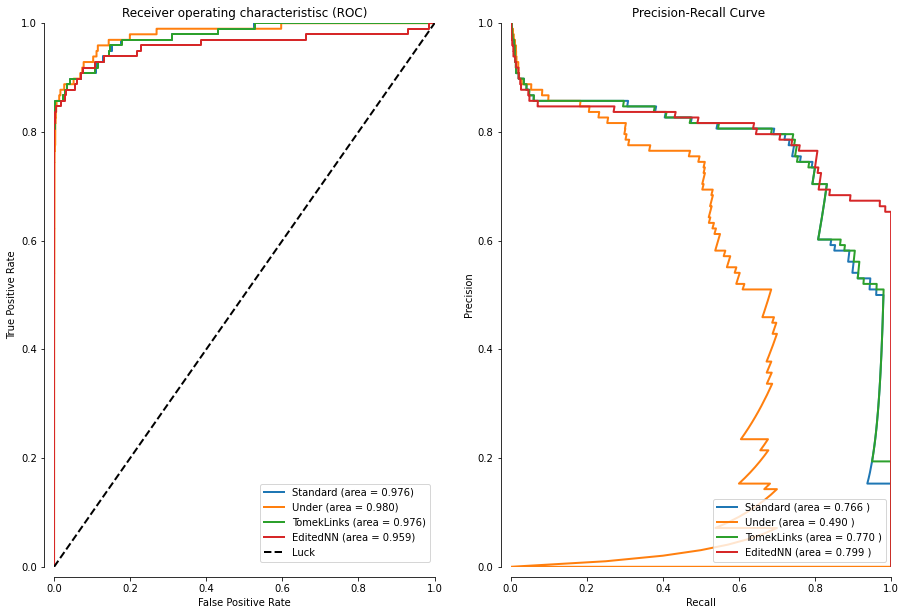

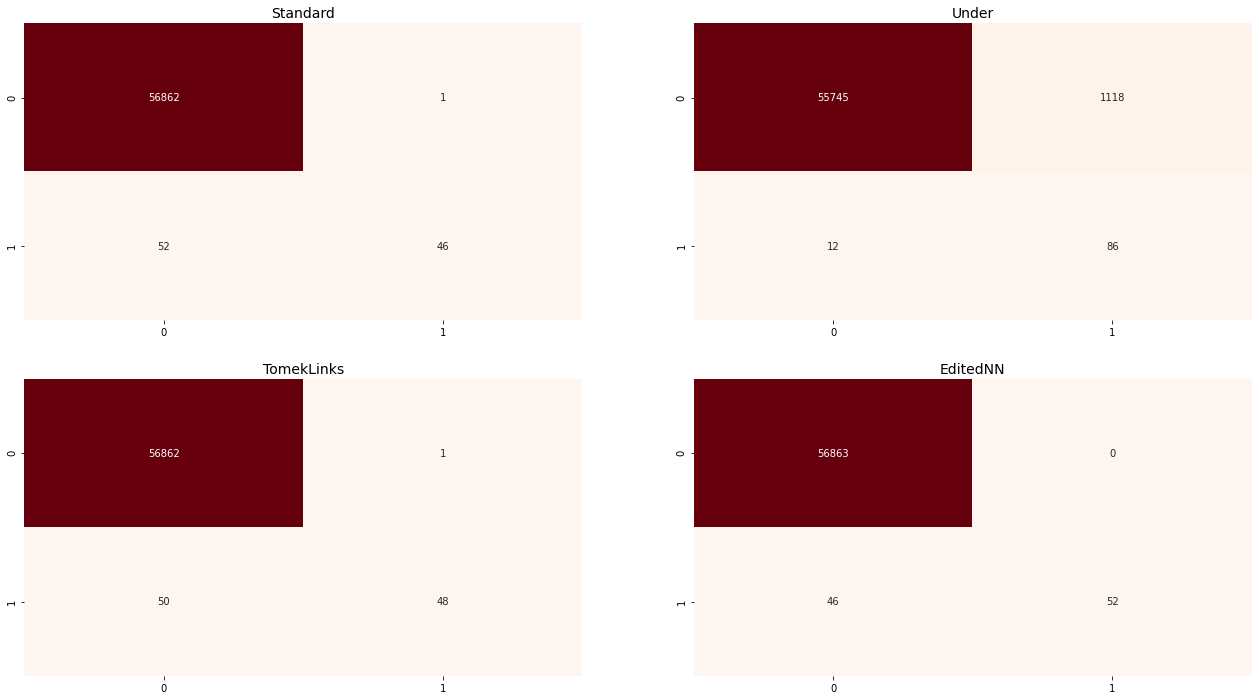

In [ ]:
LW = 2

from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours 

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]}
rand_log_reg = RandomizedSearchCV(LogisticRegression(solver='liblinear'), log_reg_params, n_iter=4)

samplers = [
    ['Standard', DummySampler()],
    ['Under', RandomUnderSampler()],
    ['TomekLinks', TomekLinks()],
    ['EditedNN', EditedNearestNeighbours()],]

pipelines = [['{}'.format(sampler[0]),make_pipeline(sampler[1], rand_log_reg )] for sampler in samplers ]
report_list = pd.DataFrame( index = ['f1', 'precision', 'recall',' average_precision' ],columns =[sampler[0] for sampler in samplers])

fig, axs = plt.subplots(1, 2, figsize=(15,10))
fig1, axs1 = plt.subplots(2, 2, figsize=(22,12))
title_cm= [sampler[0] for sampler in samplers]
for (idx, (name, pipeline)), ax1 in zip(enumerate(pipelines,0), axs1.flat):
    pipeline.fit(Xtrain, ytrain)
    best_clf = rand_log_reg.best_estimator_
    yhat= best_clf.predict_proba(Xtest)
    ypred0 = best_clf.decision_function(Xtest)
    ypred = best_clf.predict(Xtest)
    fpr, tpr, thresholds = roc_curve(ytest, yhat[:,1])
    roc_auc = auc(fpr, tpr)
    f1 = f1_score(ytest,ypred)
    pr, re, thresholds = precision_recall_curve(ytest, yhat[:,1])
    pr_auc = auc(re, pr)
    report_list.iloc[[0],[idx]] = [f1]
    report_list.iloc[[1],[idx]] = [metrics.precision_score(ytest, ypred)]
    report_list.iloc[[2],[idx]] = [metrics.recall_score(ytest, ypred)]
    report_list.iloc[[3],[idx]] = [average_precision_score(ytest, yhat[:,1])]    
    axs[1].plot(pr, re, linestyle='-', label=r'%s (area = %0.3f )' % (name, pr_auc),lw=LW)
    axs[0].plot(fpr, tpr, label='{} (area = %0.3f)'.format(name) % roc_auc, lw=LW)
# confusion_matrix
    cm_nn = confusion_matrix(ytest,ypred)
    sns.heatmap(cm_nn, ax=ax1,annot=True,robust=True,fmt='g' ,cmap="Reds", cbar=False)
    ax1.set_title(title_cm[idx], fontsize=14)

axs[0].plot([0, 1], [0, 1], linestyle='--', lw=LW, color='k', label='Luck')
# make nice plotting
xlabel= ['False Positive Rate', 'Recall']
ylabel= ['True Positive Rate', 'Precision']
title = ['Receiver operating characteristisc (ROC)', 'Precision-Recall Curve ']
for i, ax in  enumerate(axs.flat, 0):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.axis(xmin=0,xmax=1)
    ax.axis(ymin=0,ymax=1)
    ax.set_xlabel(xlabel[i])
    ax.set_ylabel(ylabel[i])
    ax.set_title(title[i])
    ax.legend(loc="lower right")

plt.show()


In [ ]:
report_list

,Standard,Under,TomekLinks,EditedNN
f1,0.634483,0.132104,0.653061,0.693333
precision,0.978723,0.0714286,0.979592,1
recall,0.469388,0.877551,0.489796,0.530612
average_precision,0.766705,0.496905,0.770405,0.799639


## Benchmark  combinations of over and undersampling methods
1. SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

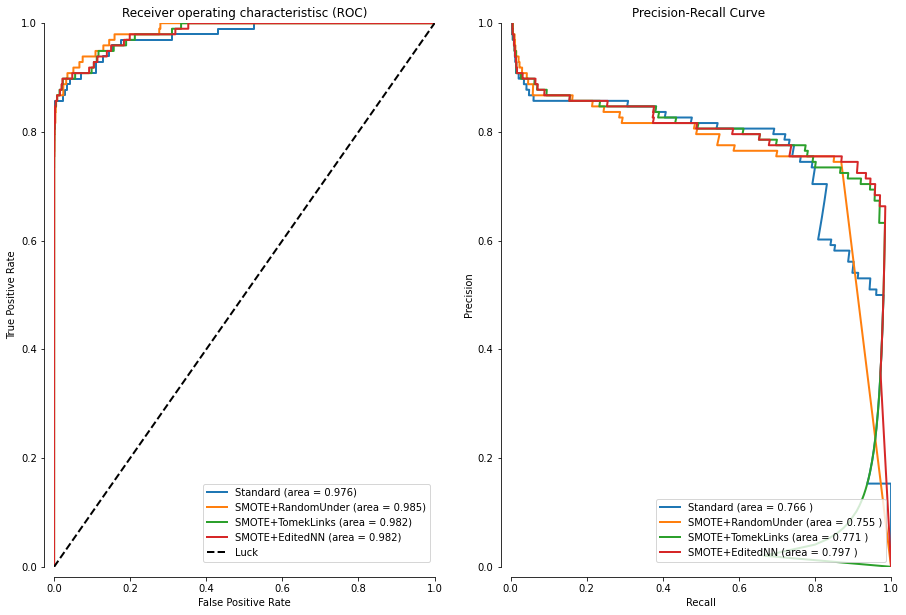

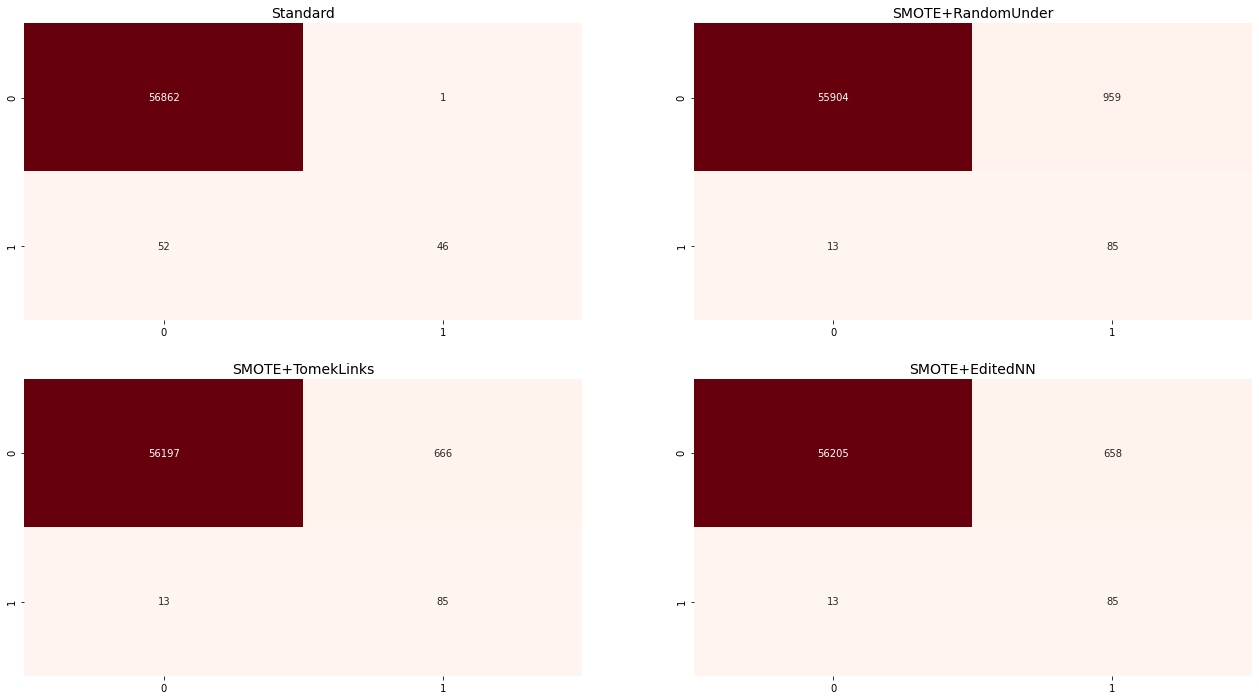

In [ ]:
LW = 2

from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours 

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]}
rand_log_reg = RandomizedSearchCV(LogisticRegression(solver='liblinear'), log_reg_params, n_iter=4)

SamplersOverUnder = [
    ['Standard', [DummySampler(),DummySampler()]],
    ['SMOTE+RandomUnder', [ RandomUnderSampler(), SMOTE()]],
    ['SMOTE+TomekLinks', [TomekLinks(),SMOTE()  ]],
    ['SMOTE+EditedNN', [EditedNearestNeighbours(), SMOTE(),  ]],]
pipelines = [ ['{}'.format(samplerOvUn[0]), make_pipeline(samplerOvUn[1][0],samplerOvUn[1][1], rand_log_reg )] for samplerOvUn in SamplersOverUnder ]
report_list = pd.DataFrame( index = ['f1', 'precision', 'recall',' average_precision' ],columns =[sampler[0] for sampler in SamplersOverUnder])

fig, axs = plt.subplots(1, 2, figsize=(15,10))
fig1, axs1 = plt.subplots(2, 2, figsize=(22,12))
title_cm= [sampler[0] for sampler in SamplersOverUnder]
for (idx, (name, pipeline)), ax1 in zip(enumerate(pipelines,0), axs1.flat):
    pipeline.fit(Xtrain, ytrain)
    best_clf = rand_log_reg.best_estimator_
    yhat= best_clf.predict_proba(Xtest)
    ypred0 = best_clf.decision_function(Xtest)
    ypred = best_clf.predict(Xtest)
    fpr, tpr, thresholds = roc_curve(ytest, yhat[:,1])
    roc_auc = auc(fpr, tpr)
    f1 = f1_score(ytest,ypred)
    pr, re, thresholds = precision_recall_curve(ytest, yhat[:,1])
    pr_auc = auc(re, pr)
    report_list.iloc[[0],[idx]] = [f1]
    report_list.iloc[[1],[idx]] = [metrics.precision_score(ytest, ypred)]
    report_list.iloc[[2],[idx]] = [metrics.recall_score(ytest, ypred)]
    report_list.iloc[[3],[idx]] = [average_precision_score(ytest, yhat[:,1])]    
    axs[1].plot(pr, re, linestyle='-', label=r'%s (area = %0.3f )' % (name, pr_auc),lw=LW)
    axs[0].plot(fpr, tpr, label='{} (area = %0.3f)'.format(name) % roc_auc, lw=LW)
# confusion_matrix
    cm_nn = confusion_matrix(ytest,ypred)
    sns.heatmap(cm_nn, ax=ax1,annot=True,robust=True,fmt='g' ,cmap="Reds", cbar=False)
    ax1.set_title(title_cm[idx], fontsize=14)

axs[0].plot([0, 1], [0, 1], linestyle='--', lw=LW, color='k', label='Luck')
# make nice plotting
xlabel= ['False Positive Rate', 'Recall']
ylabel= ['True Positive Rate', 'Precision']
title = ['Receiver operating characteristisc (ROC)', 'Precision-Recall Curve ']
for i, ax in  enumerate(axs.flat, 0):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.axis(xmin=0,xmax=1)
    ax.axis(ymin=0,ymax=1)
    ax.set_xlabel(xlabel[i])
    ax.set_ylabel(ylabel[i])
    ax.set_title(title[i])
    ax.legend(loc="lower right")

plt.show()


2. ADASYN

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

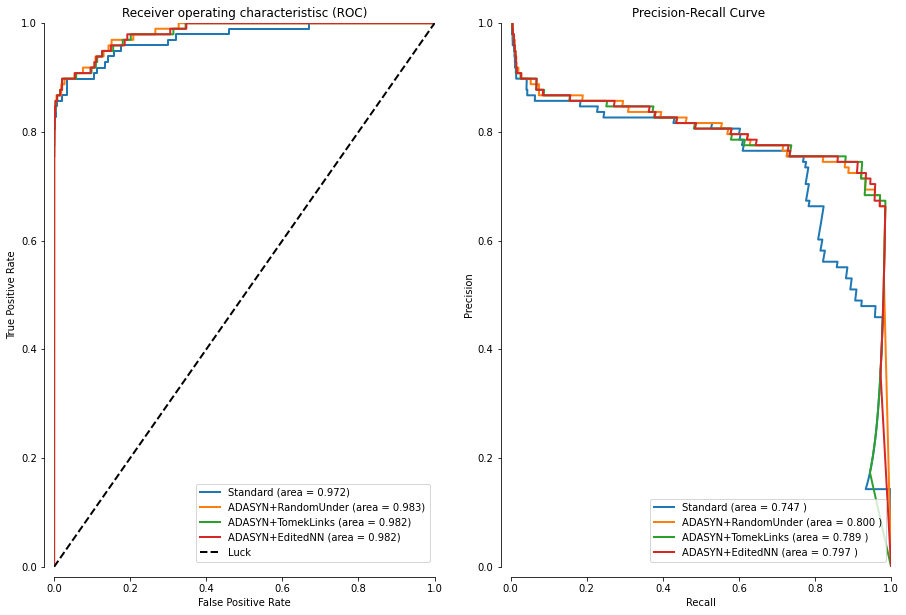

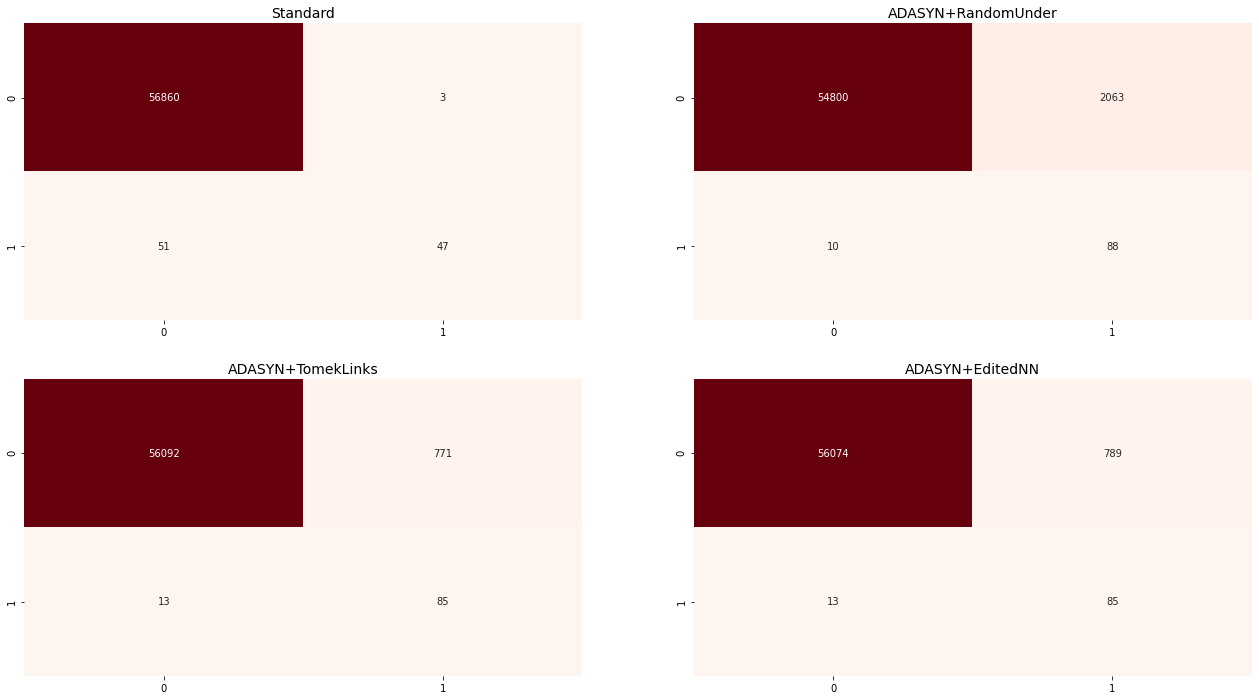

In [ ]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours 

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]}
rand_log_reg = RandomizedSearchCV(LogisticRegression(solver='liblinear'), log_reg_params, n_iter=4)

SamplersOverUnder = [
    ['Standard', [DummySampler(),DummySampler()]],
    ['ADASYN+RandomUnder', [ADASYN(sampling_strategy=0.3), RandomUnderSampler()]],
    ['ADASYN+TomekLinks', [ADASYN(sampling_strategy=0.3),  TomekLinks()]],
    ['ADASYN+EditedNN', [ADASYN(sampling_strategy=0.3),  EditedNearestNeighbours()]],]
pipelines = [ ['{}'.format(samplerOvUn[0]), make_pipeline(samplerOvUn[1][0],samplerOvUn[1][1], rand_log_reg )] for samplerOvUn in SamplersOverUnder ]
report_list = pd.DataFrame( index = ['f1', 'precision', 'recall',' average_precision' ],columns =[sampler[0] for sampler in SamplersOverUnder])

fig, axs = plt.subplots(1, 2, figsize=(15,10))
fig1, axs1 = plt.subplots(2, 2, figsize=(22,12))
title_cm= [sampler[0] for sampler in SamplersOverUnder]
for (idx, (name, pipeline)), ax1 in zip(enumerate(pipelines,0), axs1.flat):
    pipeline.fit(Xtrain, ytrain)
    best_clf = rand_log_reg.best_estimator_
    yhat= best_clf.predict_proba(Xtest)
    ypred = best_clf.predict(Xtest)
    fpr, tpr, thresholds = roc_curve(ytest, yhat[:,1])
    roc_auc = auc(fpr, tpr)
    f1 = f1_score(ytest,ypred)
    pr, re, thresholds = precision_recall_curve(ytest, yhat[:,1])
    pr_auc = auc(re, pr)
    report_list.iloc[[0],[idx]] = [f1]
    report_list.iloc[[1],[idx]] = [metrics.precision_score(ytest, ypred)]
    report_list.iloc[[2],[idx]] = [metrics.recall_score(ytest, ypred)]
    report_list.iloc[[3],[idx]] = [average_precision_score(ytest, yhat[:,1])]    
    axs[1].plot(pr, re, linestyle='-', label=r'%s (area = %0.3f )' % (name, pr_auc),lw=LW)
    axs[0].plot(fpr, tpr, label='{} (area = %0.3f)'.format(name) % roc_auc, lw=LW)
# confusion_matrix
    cm_nn = confusion_matrix(ytest,ypred)
    sns.heatmap(cm_nn, ax=ax1,annot=True,robust=True,fmt='g' ,cmap="Reds", cbar=False)
    ax1.set_title(title_cm[idx], fontsize=14)

axs[0].plot([0, 1], [0, 1], linestyle='--', lw=LW, color='k', label='Luck')
# make nice plotting
xlabel= ['False Positive Rate', 'Recall']
ylabel= ['True Positive Rate', 'Precision']
title = ['Receiver operating characteristisc (ROC)', 'Precision-Recall Curve ']
for i, ax in  enumerate(axs.flat, 0):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.axis(xmin=0,xmax=1)
    ax.axis(ymin=0,ymax=1)
    ax.set_xlabel(xlabel[i])
    ax.set_ylabel(ylabel[i])
    ax.set_title(title[i])
    ax.legend(loc="lower right")

plt.show()


In [ ]:
report_list

,Standard,ADASYN+RandomUnder,ADASYN+TomekLinks,ADASYN+EditedNN
f1,0.635135,0.078257,0.178197,0.174897
precision,0.94,0.0409112,0.0992991,0.097254
recall,0.479592,0.897959,0.867347,0.867347
average_precision,0.747399,0.794883,0.78442,0.79188
